In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_blobs(1000, n_features=2, centers=[[2,3], [4,5]])
print(X.shape, y.shape)


(1000, 2) (1000,)


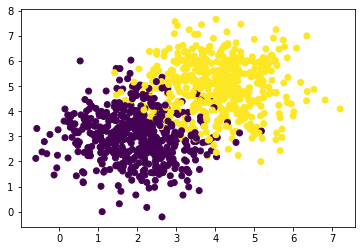

In [3]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [4]:
X0 = X[y==0]
y0 = y[y==0]
print(X0.shape, y0.shape)

X1 = X[y==1][:20]
y1 = y[y==1][:20]
print(X1.shape, y1.shape)

(500, 2) (500,)
(20, 2) (20,)


In [5]:
X_ = np.concatenate([X0,X1], axis=0)
y_ = np.concatenate([y0, y1], axis=0)

print(X_.shape, y_.shape)

(520, 2) (520,)


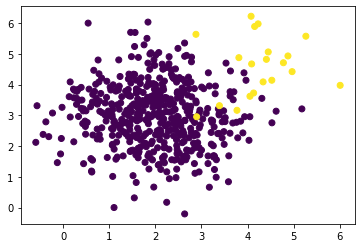

In [6]:
plt.scatter(X_[:,0], X_[:,1], c = y_)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression()
lr.fit(X_, y_)
ypred = lr.predict(X_)

In [16]:
acc = (ypred == y_).mean()
print(acc)

0.9807692307692307


In [18]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [20]:
precision_score(y_, ypred)

0.8125

In [22]:
recall_score(y_, ypred)

0.65

In [24]:
f1_score(y_, ypred)

0.7222222222222223

In [25]:
confusion_matrix(y_, ypred)

array([[497,   3],
       [  7,  13]], dtype=int64)

In [32]:
print(classification_report(y_, ypred, digits=2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.81      0.65      0.72        20

    accuracy                           0.98       520
   macro avg       0.90      0.82      0.86       520
weighted avg       0.98      0.98      0.98       520



In [10]:
prob = lr.predict_proba(X_)
prob = prob[:,1]

In [11]:
threshold = np.arange(0, 1, 0.05)
for th in threshold:
    accuracy = (prob > th).mean()
    print("threshold %.2f, accuracy: %.2f"%(th, accuracy))    


threshold 0.00, accuracy: 1.00
threshold 0.05, accuracy: 0.09
threshold 0.10, accuracy: 0.06
threshold 0.15, accuracy: 0.05
threshold 0.20, accuracy: 0.05
threshold 0.25, accuracy: 0.05
threshold 0.30, accuracy: 0.04
threshold 0.35, accuracy: 0.03
threshold 0.40, accuracy: 0.03
threshold 0.45, accuracy: 0.03
threshold 0.50, accuracy: 0.03
threshold 0.55, accuracy: 0.03
threshold 0.60, accuracy: 0.03
threshold 0.65, accuracy: 0.02
threshold 0.70, accuracy: 0.02
threshold 0.75, accuracy: 0.02
threshold 0.80, accuracy: 0.02
threshold 0.85, accuracy: 0.02
threshold 0.90, accuracy: 0.01
threshold 0.95, accuracy: 0.00


In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

In [27]:
fpr, tpr, thresholds = roc_curve(y_, y_score = lr.predict_proba(X_)[:,1])

In [28]:
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.002, 0.002, 0.012, 0.012, 0.014, 0.014,
        0.042, 0.042, 0.058, 0.058, 0.222, 0.222, 1.   ]),
 array([0.  , 0.05, 0.5 , 0.5 , 0.7 , 0.7 , 0.8 , 0.8 , 0.85, 0.85, 0.9 ,
        0.9 , 0.95, 0.95, 1.  , 1.  ]),
 array([1.98714851e+00, 9.87148513e-01, 8.00395562e-01, 6.92860079e-01,
        5.36993349e-01, 3.27826053e-01, 3.02193287e-01, 2.95889577e-01,
        2.50873049e-01, 8.74390545e-02, 8.63033276e-02, 4.80680867e-02,
        4.79633588e-02, 1.01522128e-02, 1.00631643e-02, 1.41554216e-06]))

In [ ]:
# class 0


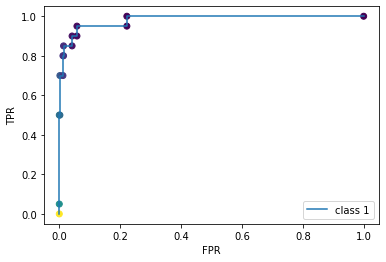

In [29]:
plt.plot(fpr, tpr, label="class 1")
plt.scatter(fpr, tpr, c=thresholds)

# class 0
# fpr, tpr, thresholds = roc_curve(y_, y_score = lr.predict_proba(X_)[:,0],pos_label=1) # class 0
# plt.plot(fpr, tpr, label="class 0")
# plt.scatter(fpr, tpr, c=thresholds)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [21]:
roc_auc_score(y_, y_score = lr.predict_proba(X_)[:,1])

0.9816